<a href="https://colab.research.google.com/github/tuba89/MachineLearning/blob/main/prdicting_price_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = '/content/drive/MyDrive/kc_house_data.csv'

In [ ]:
# Importing the Required Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housedf = pd.read_csv(path)
housedf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
housedf.shape

(21613, 21)

# preprocessing

* enlever la colonne "id" inutile

In [ ]:
housedf = housedf.drop("id", 1)

In [ ]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

* changer formt de date pour mieux visualiser les prix par le temps

In [ ]:
# 1- changer "date feature" en date format
housedf['date'] = pd.to_datetime(housedf['date'])



In [ ]:
# 2- changer format yyyy-mm-dd to mois-année
housedf['date'] = housedf['date'].apply(lambda x: x.strftime('%B-%Y')) 

In [ ]:
housedf.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,October-2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,December-2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,February-2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,December-2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,February-2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* changer square feet to square meter (car je comprends mieux en mètre carré)

In [ ]:
def sqft_sqM(a):
    a = a/10.764
    return ("%.2f" % a)
housedf['sqft_lot'] = housedf['sqft_lot'].apply(sqft_sqM)

In [ ]:
housedf['sqft_living'] = housedf['sqft_living'].apply(sqft_sqM)
housedf['sqft_above'] = housedf['sqft_above'].apply(sqft_sqM)
housedf['sqft_basement'] = housedf['sqft_basement'].apply(sqft_sqM)
housedf['sqft_living15'] = housedf['sqft_living15'].apply(sqft_sqM)
housedf['sqft_lot15'] = housedf['sqft_lot15'].apply(sqft_sqM)

In [ ]:
housedf.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,October-2014,221900.0,3,1.00,109.62,524.90,1.0,0,0,3,7,109.62,0.00,1955,0,98178,47.5112,-122.257,124.49,524.90
1,December-2014,538000.0,3,2.25,238.76,672.80,2.0,0,0,3,7,201.60,37.16,1951,1991,98125,47.7210,-122.319,157.00,709.68
2,February-2015,180000.0,2,1.00,71.53,929.02,1.0,0,0,3,6,71.53,0.00,1933,0,98028,47.7379,-122.233,252.69,748.98
3,December-2014,604000.0,4,3.00,182.09,464.51,1.0,0,0,5,7,97.55,84.54,1965,0,98136,47.5208,-122.393,126.35,464.51
4,February-2015,510000.0,3,2.00,156.08,750.65,1.0,0,0,3,8,156.08,0.00,1987,0,98074,47.6168,-122.045,167.22,697.05


In [ ]:
housedf.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Comment : pas de valeurs manquantes

In [ ]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  object 
 5   sqft_lot       21613 non-null  object 
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  object 
 12  sqft_basement  21613 non-null  object 
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
housedf['sqft_above'].value_counts()

120.77    212
93.83     210
111.48    206
113.34    192
105.91    184
         ... 
505.39      1
98.57       1
205.96      1
182.18      1
114.46      1
Name: sqft_above, Length: 946, dtype: int64

In [ ]:
housedf['sqft_living15'].value_counts()



143.07    197
133.78    195
144.93    192
139.35    181
135.64    169
         ... 
132.39      1
100.71      1
197.42      1
104.52      1
107.40      1
Name: sqft_living15, Length: 777, dtype: int64

* changer objet to float pour visualiser

In [ ]:
housedf[["sqft_living", "sqft_lot"]] = housedf[["sqft_living", "sqft_lot"]].apply(pd.to_numeric)
housedf[["sqft_above", "sqft_basement"]] = housedf[["sqft_above", "sqft_basement"]].apply(pd.to_numeric)
housedf[["sqft_living15", "sqft_lot15"]] = housedf[["sqft_living15", "sqft_lot15"]].apply(pd.to_numeric)

* changer les valeurs de "bathrooms" et "floor" de float à int, car il n y a pas de 1 étage et de demi / ou une salle de bain et 75

In [ ]:
housedf['bathrooms'] = housedf['bathrooms'].astype(int)
housedf['floors'] = housedf['floors'].astype(int)

In [ ]:
housedf['floors'].value_counts()

1    12590
2     8402
3      621
Name: floors, dtype: int64

In [ ]:
housedf['sqft_basement'].value_counts()


0.00      13126
55.74       221
65.03       218
46.45       214
74.32       206
          ...  
242.47        1
141.68        1
95.13         1
243.40        1
325.16        1
Name: sqft_basement, Length: 306, dtype: int64

In [ ]:
# chnager les noms des colonnes
housedf = housedf.rename({'sqft_living': 'M2_living', 'sqft_lot': 'M2_lot'}, axis=1)
housedf = housedf.rename({'sqft_basement': 'M2_basement'}, axis=1)

* Enlever "sqft_living15 et "sqft_lot15" features car je penses que ce sont des colonnes inutiles

In [ ]:
housedf = housedf.drop(["sqft_living15", "sqft_lot15"], 1)

In [ ]:
housedf.head()

,date,price,bedrooms,bathrooms,M2_living,M2_lot,floors,waterfront,view,condition,grade,sqft_above,M2_basement,yr_built,yr_renovated,zipcode,lat,long
0,October-2014,221900.0,3,1,109.62,524.90,1,0,0,3,7,109.62,0.00,1955,0,98178,47.5112,-122.257
1,December-2014,538000.0,3,2,238.76,672.80,2,0,0,3,7,201.60,37.16,1951,1991,98125,47.7210,-122.319
2,February-2015,180000.0,2,1,71.53,929.02,1,0,0,3,6,71.53,0.00,1933,0,98028,47.7379,-122.233
3,December-2014,604000.0,4,3,182.09,464.51,1,0,0,5,7,97.55,84.54,1965,0,98136,47.5208,-122.393
4,February-2015,510000.0,3,2,156.08,750.65,1,0,0,3,8,156.08,0.00,1987,0,98074,47.6168,-122.045


* drop zipcode feature aussi car on a Longitude & Lattitude excate (la situation) et le code postale n'est pas important parapport les prix

In [ ]:
housedf = housedf.drop(["zipcode"], 1)

In [ ]:
housedf.shape

(21613, 17)

# visualisation

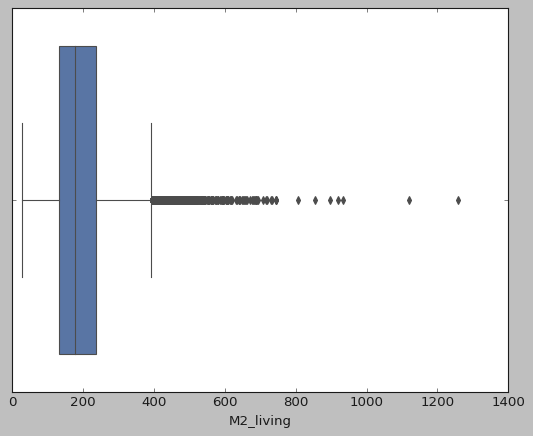

In [ ]:
sns.boxplot(x=housedf['M2_living'])

In [ ]:
from scipy import stats
z=np.abs(stats.zscore(housedf['price']))
z

array([0.86671733, 0.00568792, 0.98084935, ..., 0.37586519, 0.38158814,
       0.58588173])

In [ ]:
housedf = housedf.rename({'sqft_above': 'M2_above'}, axis=1)

In [ ]:
housedf.describe()

,price,bedrooms,bathrooms,M2_living,M2_lot,floors,waterfront,view,condition,grade,M2_above,M2_basement,yr_built,yr_renovated,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,193.227415,1403.471541,1.446213,0.007542,0.234303,3.409430,7.656873,166.145519,27.081806,1971.005136,84.402258,47.560053,-122.213896
std,3.671272e+05,0.930062,0.734873,85.325265,3848.059368,0.551894,0.086517,0.766318,0.650743,1.175459,76.931592,41.116138,29.373411,401.679240,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,26.940000,48.310000,1.000000,0.000000,0.000000,1.000000,1.000000,26.940000,0.000000,1900.000000,0.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.000000,132.570000,468.230000,1.000000,0.000000,0.000000,3.000000,7.000000,110.550000,0.000000,1951.000000,0.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.000000,177.440000,707.730000,1.000000,0.000000,0.000000,3.000000,7.000000,144.930000,0.000000,1975.000000,0.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.000000,236.900000,992.940000,2.000000,0.000000,0.000000,4.000000,8.000000,205.310000,52.030000,1997.000000,0.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,1257.900000,153414.990000,3.000000,1.000000,4.000000,5.000000,13.000000,874.210000,447.790000,2015.000000,2015.000000,47.777600,-121.315000


In [ ]:
housedf['M2_basement'].value_counts()

0.00      13126
55.74       221
65.03       218
46.45       214
74.32       206
          ...  
242.47        1
141.68        1
95.13         1
243.40        1
325.16        1
Name: M2_basement, Length: 306, dtype: int64

* Identifier les "Outliers" avec Interquartile Range (IQR)

In [ ]:
Q1 = housedf.quantile(0.25)
Q3 = housedf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price           323050.000
bedrooms             1.000
bathrooms            1.000
M2_living          104.330
M2_lot             524.710
floors               1.000
waterfront           0.000
view                 0.000
condition            1.000
grade                1.000
M2_above            94.760
M2_basement         52.030
yr_built            46.000
yr_renovated         0.000
lat                  0.207
long                 0.203
dtype: float64


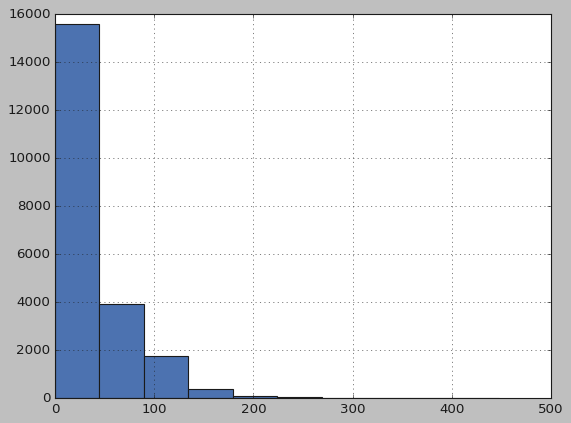

In [ ]:
# les anomalies
# M2_lot
# M2_basement	
housedf['M2_basement'].hist()

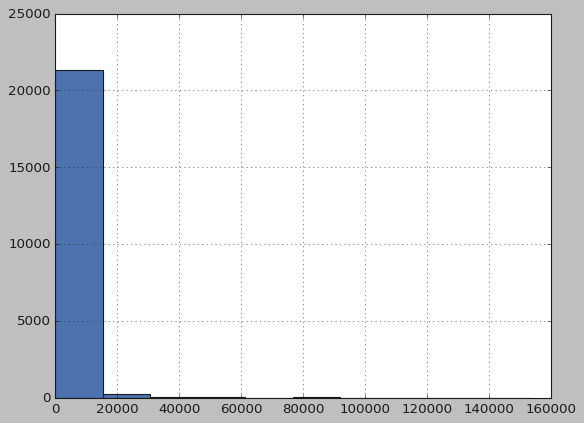

In [ ]:
housedf['M2_lot'].hist()

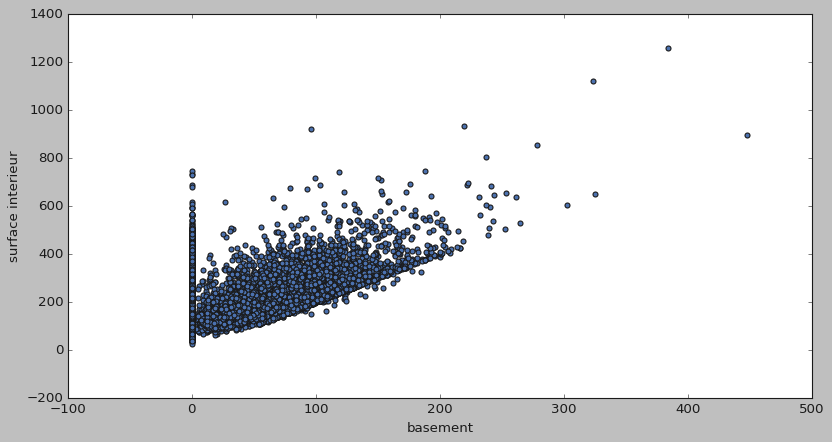

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(housedf['M2_basement'], housedf['M2_living'])
ax.set_xlabel('basement')
ax.set_ylabel('surface interieur')
plt.show()

In [ ]:
print(housedf['M2_basement'].quantile(0.10))
print(housedf['M2_basement'].quantile(0.90))

0.0
90.12


In [ ]:
housedf['M2_basement'] = np.where(housedf['M2_basement'] >90.12, 90.12,housedf['M2_basement'])

In [ ]:
print(housedf['M2_lot'].quantile(0.10))
print(housedf['M2_lot'].quantile(0.90))

308.63800000000003
1987.8899999999996


In [ ]:
housedf['M2_lot'] = np.where(housedf['M2_lot'] <308.0, 308.0,housedf['M2_lot'])
housedf['M2_lot'] = np.where(housedf['M2_lot'] >1987.0, 1987.0,housedf['M2_lot'])
print(housedf['M2_lot'].skew())

1.1846274203663918


In [ ]:
housedf.describe()

,price,bedrooms,bathrooms,M2_living,M2_lot,floors,waterfront,view,condition,grade,M2_above,M2_basement,yr_built,yr_renovated,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,193.227415,843.352395,1.446213,0.007542,0.234303,3.409430,7.656873,166.145519,24.265641,1971.005136,84.402258,47.560053,-122.213896
std,3.671272e+05,0.930062,0.734873,85.325265,500.765231,0.551894,0.086517,0.766318,0.650743,1.175459,76.931592,34.061534,29.373411,401.679240,0.138564,0.140828
min,7.500000e+04,0.000000,0.000000,26.940000,308.000000,1.000000,0.000000,0.000000,1.000000,1.000000,26.940000,0.000000,1900.000000,0.000000,47.155900,-122.519000
25%,3.219500e+05,3.000000,1.000000,132.570000,468.230000,1.000000,0.000000,0.000000,3.000000,7.000000,110.550000,0.000000,1951.000000,0.000000,47.471000,-122.328000
50%,4.500000e+05,3.000000,2.000000,177.440000,707.730000,1.000000,0.000000,0.000000,3.000000,7.000000,144.930000,0.000000,1975.000000,0.000000,47.571800,-122.230000
75%,6.450000e+05,4.000000,2.000000,236.900000,992.940000,2.000000,0.000000,0.000000,4.000000,8.000000,205.310000,52.030000,1997.000000,0.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,1257.900000,1987.000000,3.000000,1.000000,4.000000,5.000000,13.000000,874.210000,90.120000,2015.000000,2015.000000,47.777600,-121.315000


In [ ]:
housedf.shape

(21613, 17)

In [ ]:
list(housedf.columns.values)

['date',
 'price',
 'bedrooms',
 'bathrooms',
 'M2_living',
 'M2_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'M2_above',
 'M2_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long']

In [ ]:
features = [
 'bedrooms',
 'bathrooms',
 'M2_living',
 'M2_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'M2_above',
 'M2_basement',
 'yr_built',
 'yr_renovated',
 'lat',
 'long']

* correlation 

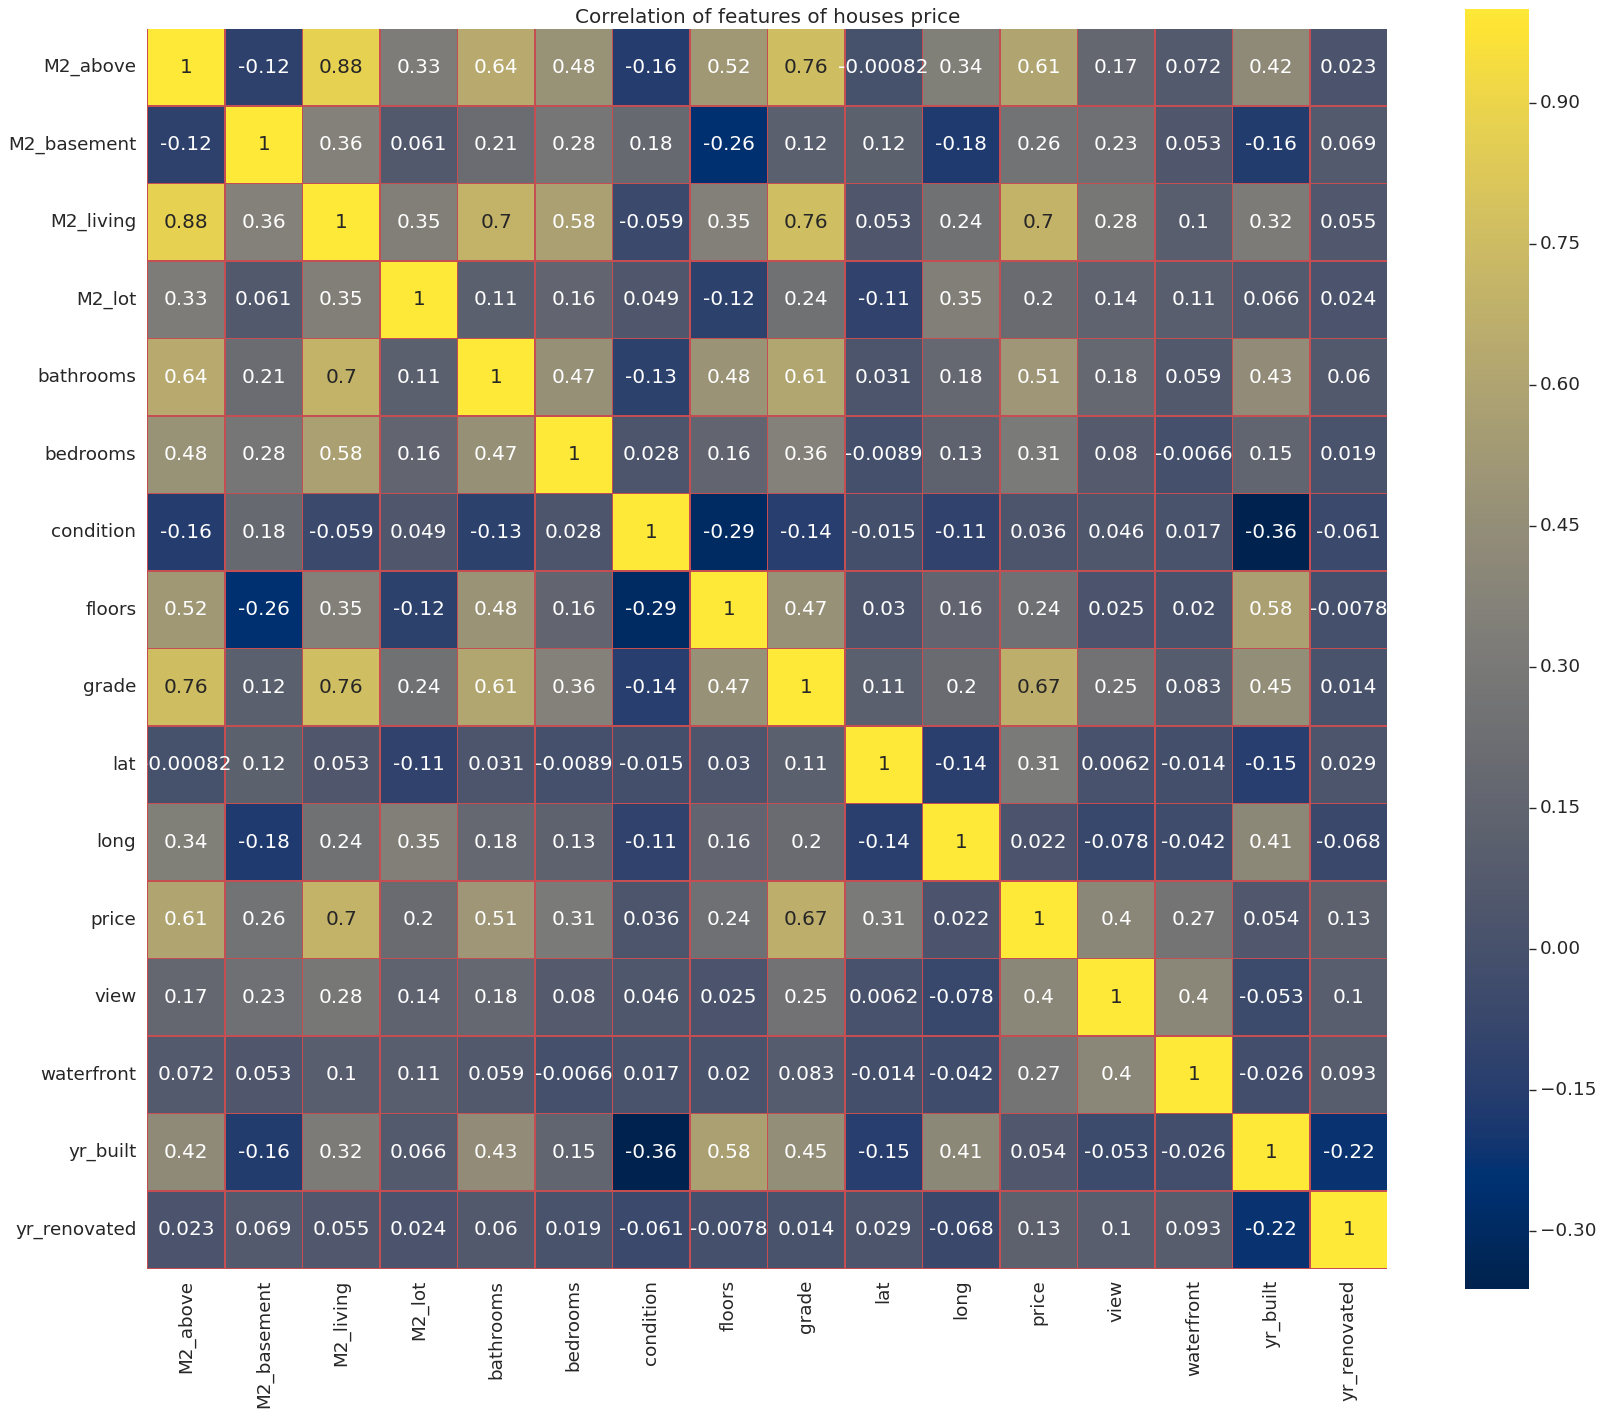

In [ ]:
sns.set(font_scale = 1.5)
# listpour remplir columns avec des mots
word_list = [] 
for colname, colvalue in housedf.iteritems():
   if type(colvalue[1]) == str:
        word_list.append(colname)
# acceder au features en inverse            
num_list = housedf.columns.difference(word_list) 

# créer Df contient (numeric features)
house_num = housedf[num_list]
f, ax = plt.subplots(figsize=(25, 20))
plt.title('Correlation of features of houses price')

# Draw the heatmap using seaborn
sns.heatmap(house_num.astype(float).corr(), linewidths = 0.25, 
            vmax=1.0, 
            square=True, 
            cmap="cividis", 
            linecolor='r', annot=True)
plt.show()

In [ ]:
# m_above - superficié interieur au dessus du basement
# m_living - superficié intérieur 
# grade - construction et de conception du logement

* ***Commentaire sur la correlations***

- il y a une correlation positive entre "grade " et le prix = 0.67,
qui veut dire que les quand le niveau de conception et de design de la construction de la maison sont élévés le prix augmente,
de même pour la superficié intérieure des maisons avec ou sans basement, 
car il ya aussi une correlation positive entre les deux features "m2_living" "m2_above" avec le prix.
m2_abaove = 0.61
m2_living = 0.7
- il y a une relation moyenne avec le "prix" et nombre de salles de bain, 
"bathrooms" features = 0.51 et aussi avec "view" feature = 0.41 (la vue)
- est une relation au dessous de la moyenne avec le "prix" et nombre de chambres, "bedrooms" feature et "lat" feature = 0.31
- et les autres features il y a une relation minime avec le prix mais pas négative


In [ ]:

feature_matrix = housedf[features]
feature_matrix_unscaled = housedf[features]
lable_vector = housedf['price']
feature_matrix_unscaled.head()


,bedrooms,bathrooms,M2_living,M2_lot,floors,waterfront,view,condition,grade,M2_above,M2_basement,yr_built,yr_renovated,lat,long
0,3,1,109.62,524.90,1,0,0,3,7,109.62,0.00,1955,0,47.5112,-122.257
1,3,2,238.76,672.80,2,0,0,3,7,201.60,37.16,1951,1991,47.7210,-122.319
2,2,1,71.53,929.02,1,0,0,3,6,71.53,0.00,1933,0,47.7379,-122.233
3,4,3,182.09,464.51,1,0,0,5,7,97.55,84.54,1965,0,47.5208,-122.393
4,3,2,156.08,750.65,1,0,0,3,8,156.08,0.00,1987,0,47.6168,-122.045


In [ ]:
from matplotlib import style
import matplotlib.lines as mlines

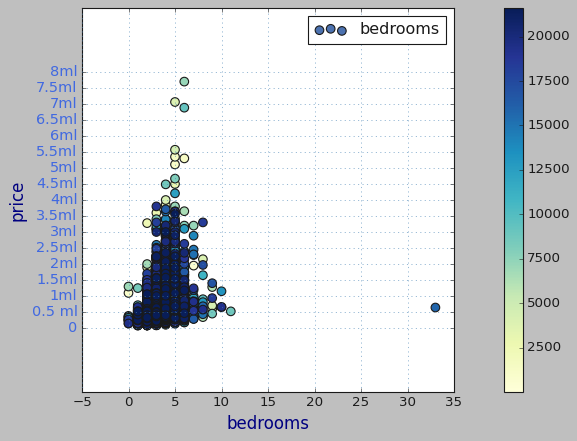

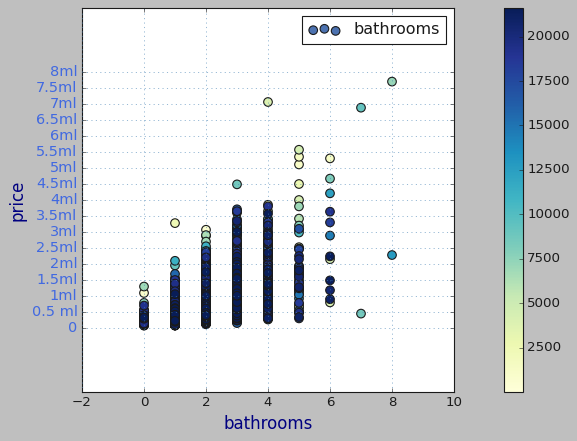

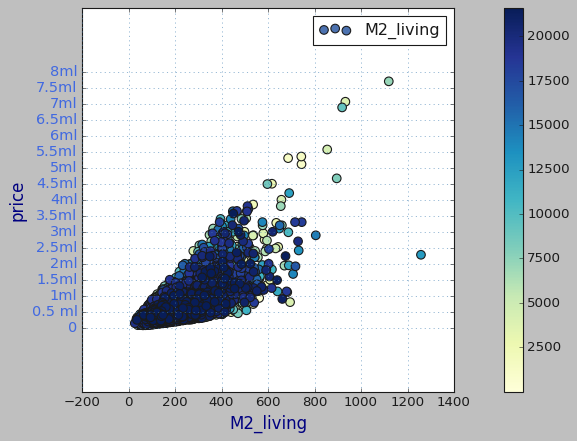

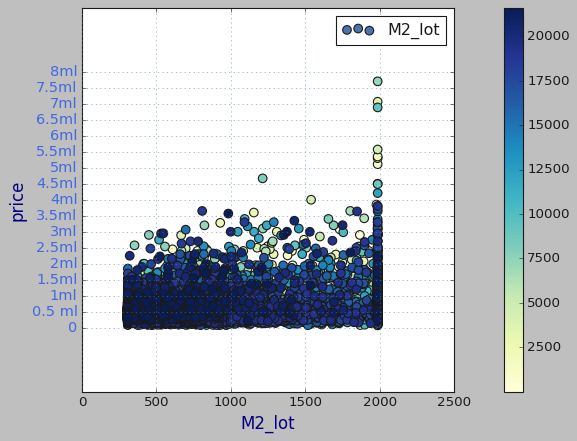

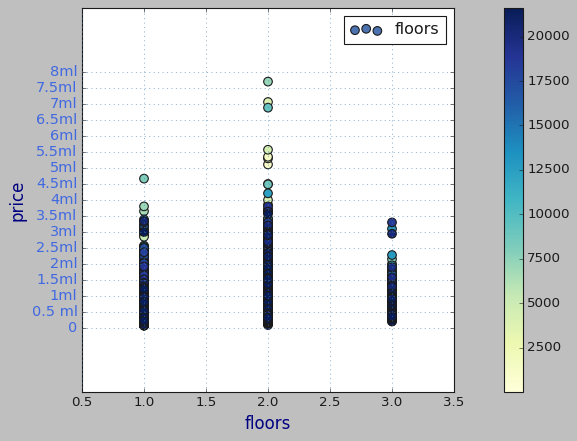

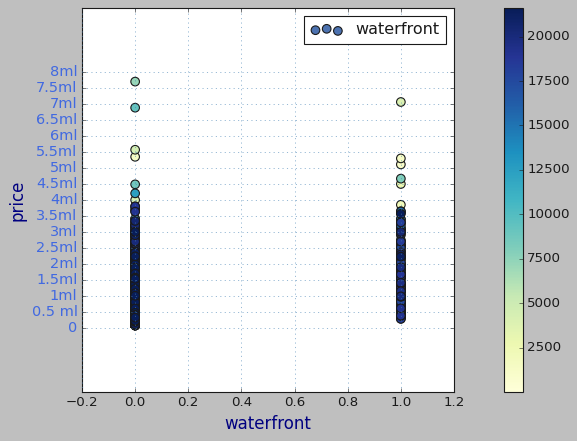

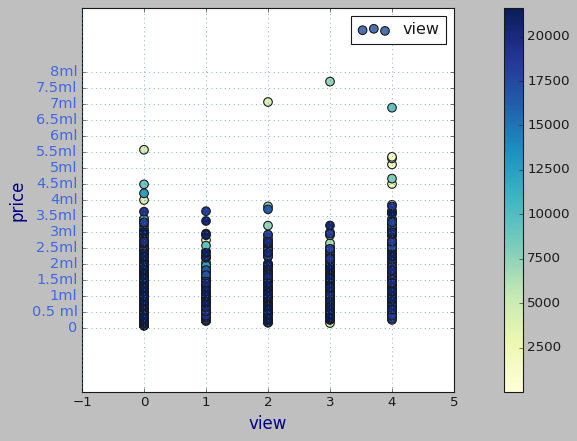

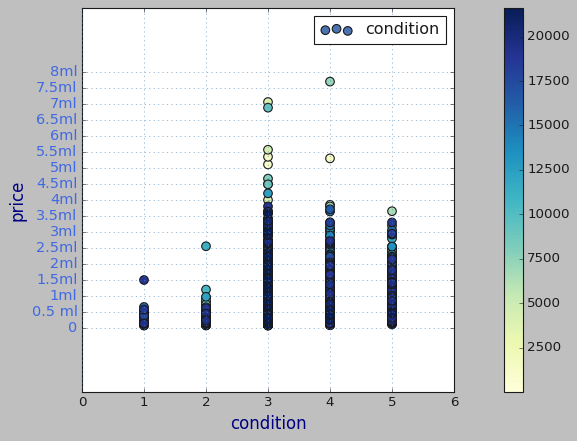

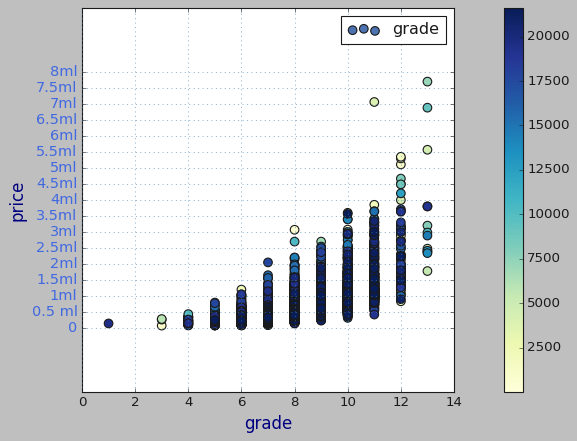

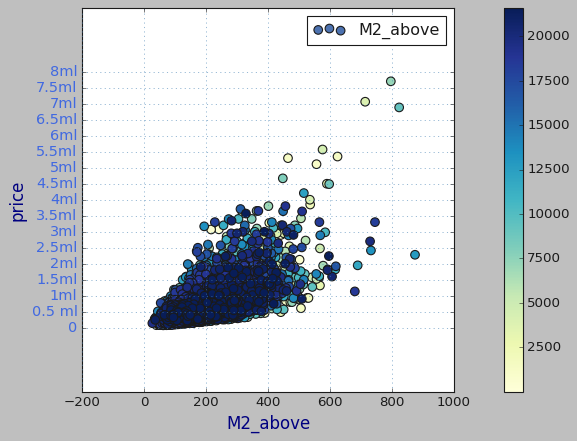

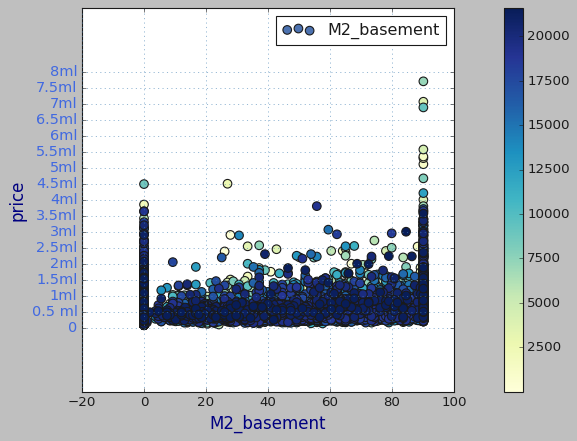

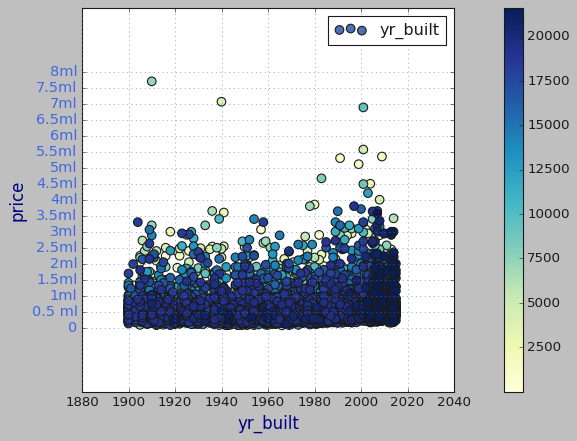

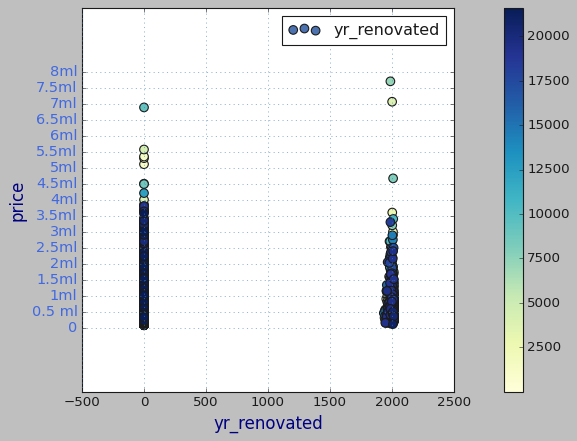

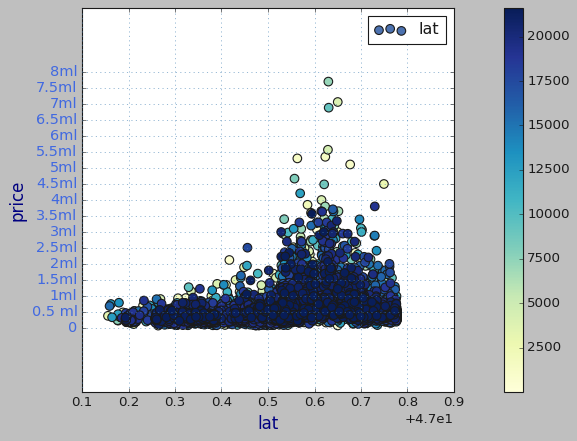

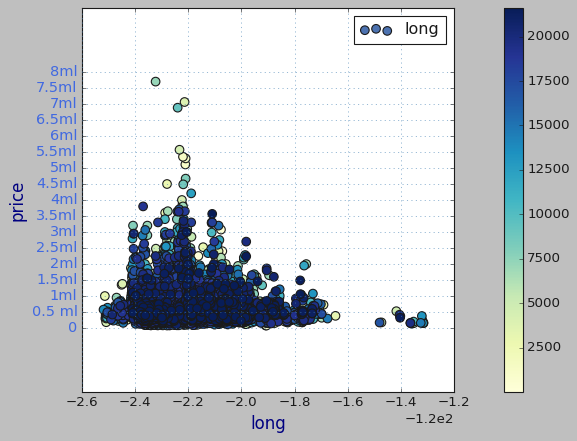

In [ ]:
#style.use('ggplot')
#cm = plt.cm.get_cmap('Blues',20)
style.use('classic')
cm = plt.cm.get_cmap('YlGnBu')
xy = range(1,21614)#
z = xy
for feature in feature_matrix_unscaled:
    sc = plt.scatter(housedf[feature], 
                     housedf['price'], 
                     label = feature, c = z,
                     marker = 'o', cmap = cm, 
                     s = 60)
    plt.colorbar(sc, pad=0.1)
    plt.xlabel(''+feature, fontsize=15, color="navy")
    plt.ylabel('price', fontsize=15, color="navy")
    plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000, 7000000, 7500000, 8000000],
            ['0', '0.5 ml', '1ml', '1.5ml', '2ml', '2.5ml', '3ml',  '3.5ml', '4ml', '4.5ml', '5ml', '5.5ml', '6ml', '6.5ml', '7ml', '7.5ml', '8ml'], fontsize=13, color="royalblue")
    #plt.legend(loc="lower left", markerscale=0.7, scatterpoints=1, fontsize=10)


    #leg = mlines.Line2D([], [], marker='o', ls='', label=feature)

    # coztomize legend
    #plt.legend(handles=[leg])
    plt.legend()
    plt.grid(color="steelblue")
    plt.show()


In [ ]:
housedf[housedf.bedrooms>20]

,date,price,bedrooms,bathrooms,M2_living,M2_lot,floors,waterfront,view,condition,grade,M2_above,M2_basement,yr_built,yr_renovated,lat,long
15870,June-2014,640000.0,33,1,150.5,557.41,1,0,0,5,7,96.62,53.88,1947,0,47.6878,-122.331


In [ ]:
housedf[housedf.bedrooms==2].head(3)

,date,price,bedrooms,bathrooms,M2_living,M2_lot,floors,waterfront,view,condition,grade,M2_above,M2_basement,yr_built,yr_renovated,lat,long
2,February-2015,180000.0,2,1,71.53,929.02,1,0,0,3,6,71.53,0.00,1933,0,47.7379,-122.233
11,May-2014,468000.0,2,1,107.77,557.41,1,0,0,4,7,79.90,27.87,1942,0,47.6900,-122.292
18,December-2014,189000.0,2,1,111.48,915.09,1,0,0,4,7,111.48,0.00,1921,0,47.3089,-122.210


In [ ]:
housedf[housedf.bedrooms==3].head(3)

,date,price,bedrooms,bathrooms,M2_living,M2_lot,floors,waterfront,view,condition,grade,M2_above,M2_basement,yr_built,yr_renovated,lat,long
0,October-2014,221900.0,3,1,109.62,524.90,1,0,0,3,7,109.62,0.00,1955,0,47.5112,-122.257
1,December-2014,538000.0,3,2,238.76,672.80,2,0,0,3,7,201.60,37.16,1951,1991,47.7210,-122.319
4,February-2015,510000.0,3,2,156.08,750.65,1,0,0,3,8,156.08,0.00,1987,0,47.6168,-122.045


In [ ]:
housedf[housedf.bedrooms>=3].head(5)

,date,price,bedrooms,bathrooms,M2_living,M2_lot,floors,waterfront,view,condition,grade,M2_above,M2_basement,yr_built,yr_renovated,lat,long
0,October-2014,221900.0,3,1,109.62,524.90,1,0,0,3,7,109.62,0.00,1955,0,47.5112,-122.257
1,December-2014,538000.0,3,2,238.76,672.80,2,0,0,3,7,201.60,37.16,1951,1991,47.7210,-122.319
3,December-2014,604000.0,4,3,182.09,464.51,1,0,0,5,7,97.55,84.54,1965,0,47.5208,-122.393
4,February-2015,510000.0,3,2,156.08,750.65,1,0,0,3,8,156.08,0.00,1987,0,47.6168,-122.045
5,May-2014,1225000.0,4,4,503.53,1987.00,1,0,0,3,11,361.39,90.12,2001,0,47.6561,-122.005


* 33 chambres c'est une anomlie, car la superficié interieur 
est environ 150 m2, Alors c'est faux 

* changer la valeur de 33 a 3, car c'est la plus logique parapport les autres surface qui ont entre 3 et 4 chambres

In [ ]:
housedf['bedrooms'] = np.where((housedf.bedrooms == 33),3, housedf.bedrooms)

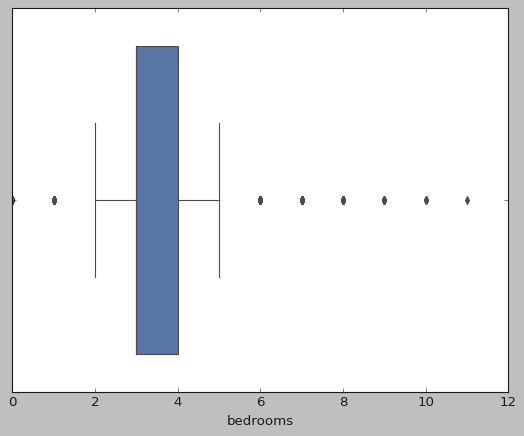

In [ ]:
sns.boxplot(x=housedf['bedrooms'])

In [ ]:
housedf['bedrooms'].value_counts()

3     9825
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [ ]:
housedf[housedf.bedrooms>9]

,date,price,bedrooms,bathrooms,M2_living,M2_lot,floors,waterfront,view,condition,grade,M2_above,M2_basement,yr_built,yr_renovated,lat,long
8757,August-2014,520000.0,11,3,278.71,460.80,2,0,0,3,7,222.97,55.74,1918,1999,47.5560,-122.363
13314,August-2014,1148000.0,10,5,426.42,1014.49,1,0,2,3,9,232.26,90.12,2008,0,47.5861,-122.113
15161,October-2014,650000.0,10,2,335.38,1106.84,2,0,0,4,7,279.64,55.74,1958,0,47.5705,-122.175
19254,December-2014,660000.0,10,3,271.27,347.92,2,0,0,4,7,172.80,90.12,1913,0,47.6635,-122.320


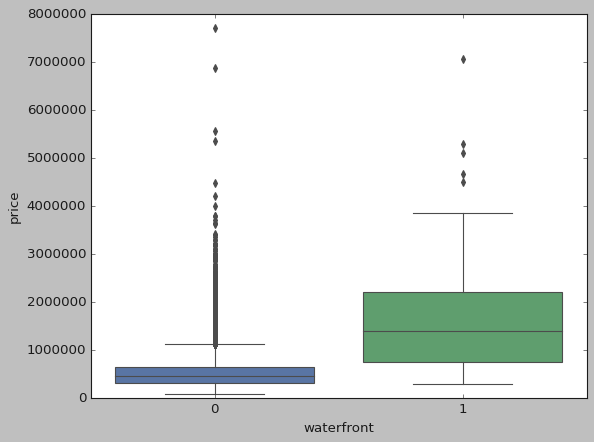

In [ ]:
sns.boxplot(x= housedf['waterfront'], y= housedf['price'])

(-0.5, 11.5, 0.0, 5000000.0)

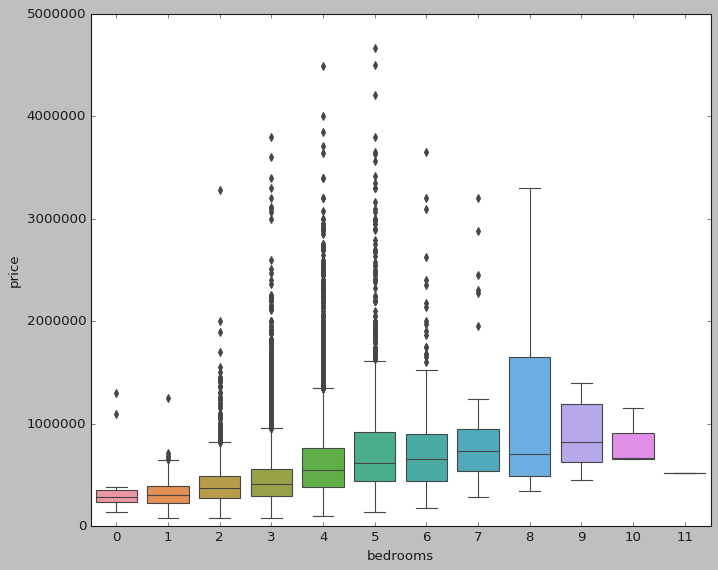

In [ ]:

data = pd.concat([housedf['price'], housedf['bedrooms']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
figure = sns.boxplot(x='bedrooms', y="price", data= housedf)
figure.axis(ymin=0, ymax=5000000)

(-0.5, 8.5, 0.0, 5000000.0)

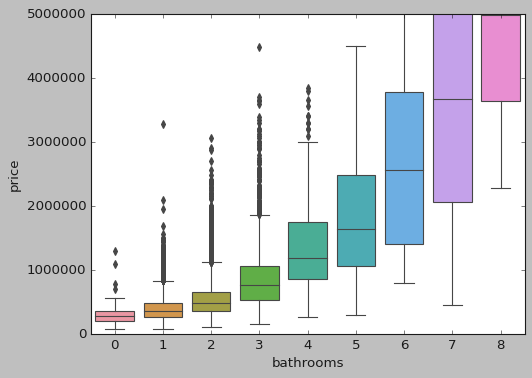

In [ ]:
data = pd.concat([housedf['price'], housedf['bathrooms']], axis=1)
f, ax = plt.subplots(figsize=(7, 5))
figure = sns.boxplot(x='bathrooms', y="price", data= housedf)
figure.axis(ymin=0, ymax=5000000)

(-0.5, 2.5, 0.0, 5000000.0)

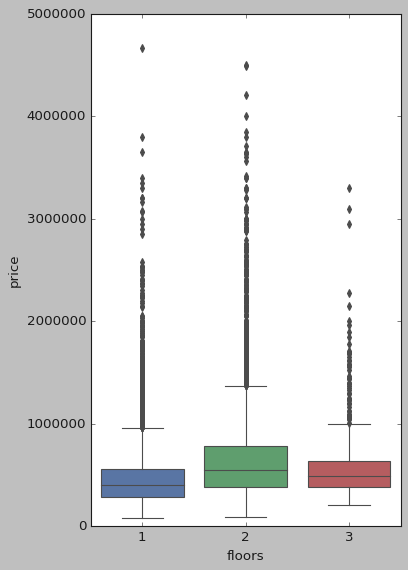

In [ ]:
data = pd.concat([housedf['price'], housedf['floors']], axis=1)
f, ax = plt.subplots(figsize=(5, 8))
figure = sns.boxplot(x='floors', y="price", data= housedf)
figure.axis(ymin=0, ymax=5000000)

(-0.5, 11.5, 0.0, 5000000.0)

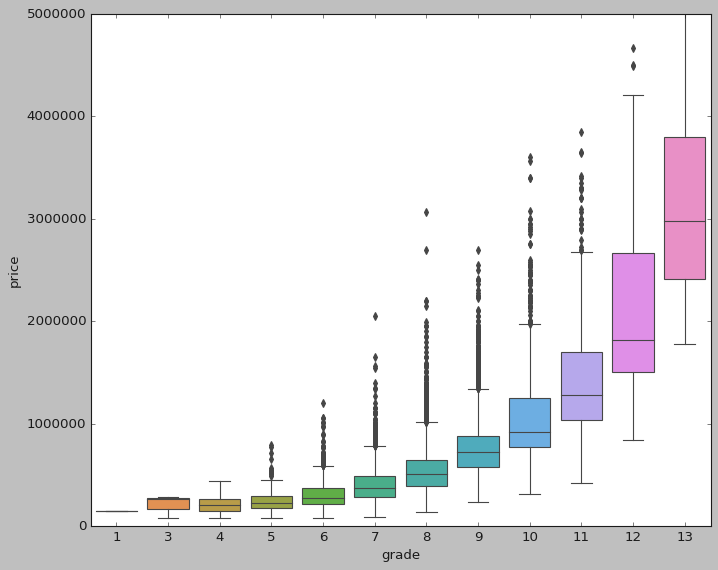

In [ ]:
data = pd.concat([housedf['price'], housedf['grade']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
figure = sns.boxplot(x='grade', y="price", data= housedf)
figure.axis(ymin=0, ymax=5000000)

* feature selection

In [ ]:
selection = ["bedrooms", "bathrooms", "floors", "grade", "M2_living", "waterfront", "M2_basement", "view","M2_above", "lat"]     


il y a une relation positive entre la list des colonnes que j'ai nommé "selection ", car selon les graph le prix augmente selon les détails suivants:
- que les features "bedrooms", "bathrooms" et grades» augmentent, au fur est a mesure quand le prix "price" augmente également. Cela est plus évident le prix augmente quand le nombres de chambres et de salle de bains augmente et aussi le prix augmente parraport le design et la conception des maison.
- quand le superficié interieure devient de plus en plus importante  le prix augmente et biensur, le nombre d'étages "floors" augmente quand la superficié interieur de la maison et grande ( living ), 
- la vue "view" et "waterfront" ont un impact moyen sur le prix
- en bref, Il existe une corrélations postive entre "m2_living", "m2_above", "bathrooms" "grade" qui ont le plus grand impact sur le prix, et les autres features plus en moin positive. (moyenne)
- On s'attendrait également à ce que l'emplacement joue un rôle "lat/long".


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#standardizing pour réduire "skewdness"
from sklearn.preprocessing import StandardScaler
#scalePrice = StandardScaler().fit_transform(housedf['price'][:,np.newaxis])
a = housedf['price']
scalePrice = StandardScaler().fit_transform(np.expand_dims(a, 1))

# np.expand_dims(a, 1)  # like a[:, np.newaxis]
lowran = scalePrice[scalePrice[: , 0].argsort()][:10]
highran= scalePrice[scalePrice[: , 0].argsort()][-10:]
print("Low : ")
print(lowran)
print("\n")
print("High")
print(highran)

Low : 
[[-1.26686039]
 [-1.25868864]
 [-1.25324081]
 [-1.2505169 ]
 [-1.24779298]
 [-1.24643103]
 [-1.24506907]
 [-1.24234515]
 [-1.23962124]
 [-1.23962124]]


High
[[10.75649871]
 [10.78646177]
 [11.24407943]
 [12.45022882]
 [12.96559346]
 [13.10178919]
 [13.70105041]
 [17.28299812]
 [17.76649297]
 [19.50298853]]


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
'''j'ai fait cette commande car je reçois défois des warning "FutureWarning:"
comme celle-ci:

usr/local/lib/python3.7/dist-packages/seaborn/distributions.py 
:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. 
Please adapt your code to use either `displot` 
(a figure-level function with similar flexibility) 
or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
''' 


* normaliser le prix

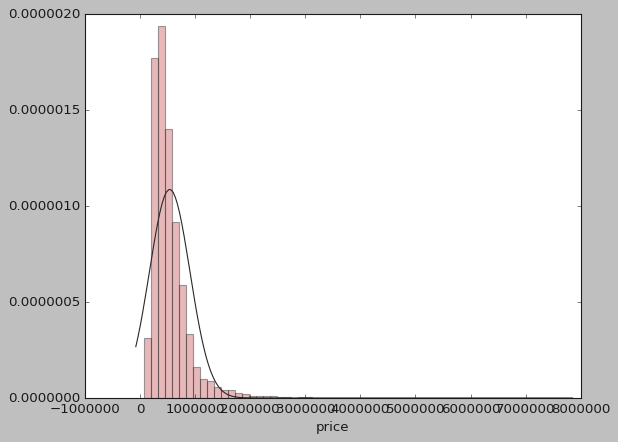

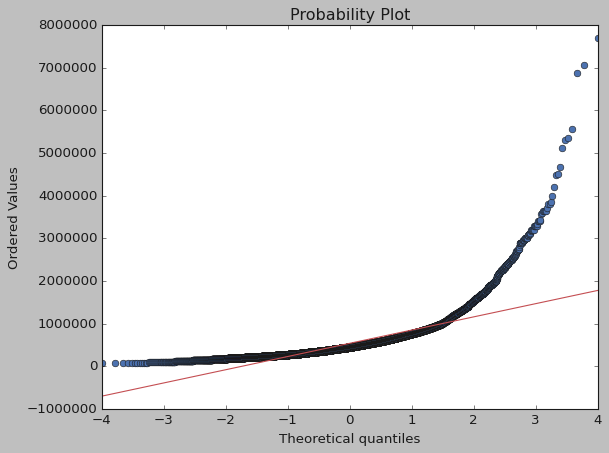

In [ ]:
from scipy.stats import norm
from scipy import stats
import seaborn as sns
# histogram & normal probability graph
sns.distplot(housedf['price'], bins=60, 
             kde=False, 
             fit=norm, 
             color="r")
fig = plt.figure()
res = stats.probplot(housedf['price'], plot=plt)

* appliquer "log" transformation pour ajuster la courbe

In [ ]:
housedf['price'] = np.log(housedf['price'])

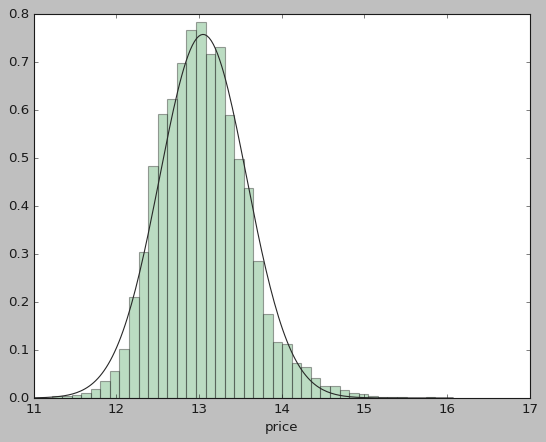

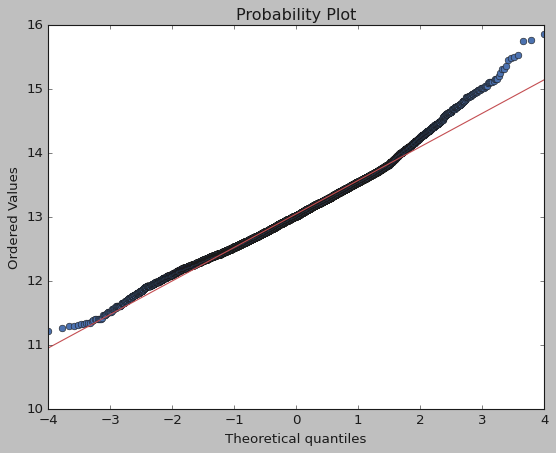

In [ ]:
# visualiser les plots après log transformation et normalisation
# histogram & normal probability graph
sns.distplot(housedf['price'], bins=40, 
             kde=False, 
             fit=norm, 
             color="g")
fig = plt.figure()
res = stats.probplot(housedf['price'], plot=plt)


* Normaliser "m2_living" surface home intérieure

--









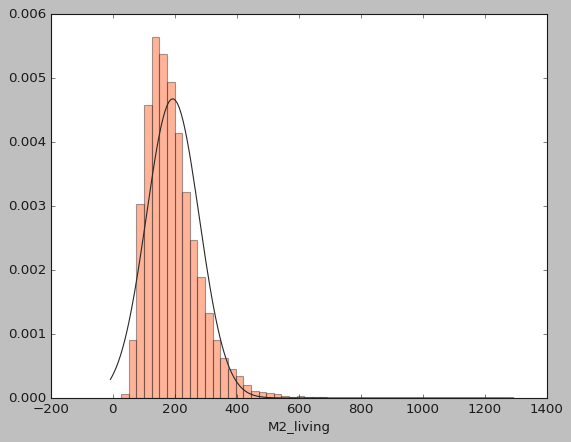

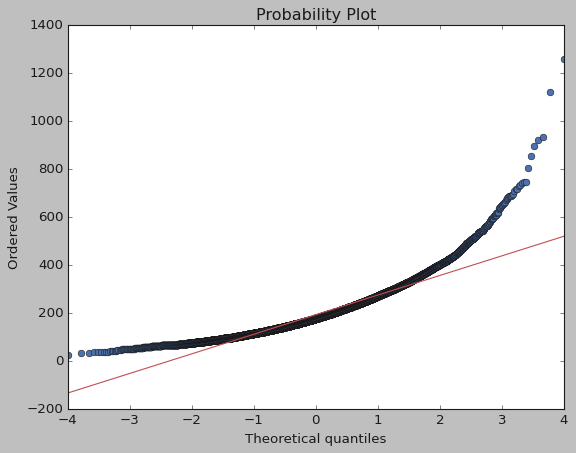

In [ ]:
sns.distplot(housedf['M2_living'], 
             fit= norm, 
             bins= 50, 
             kde= False,
             color= "orangered")
fig = plt.figure()
res = stats.probplot(housedf['M2_living'], plot=plt)

* transformation

In [ ]:
housedf['M2_living'] = np.log(housedf['M2_living'])

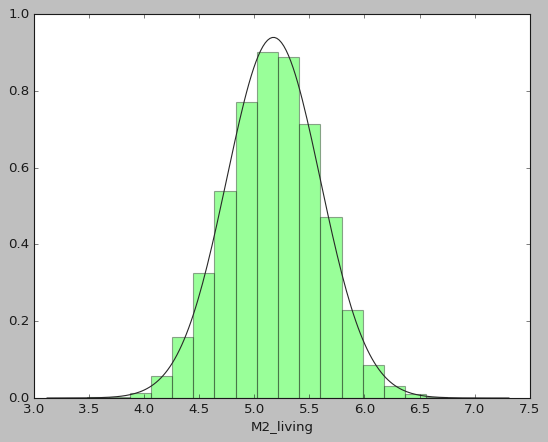

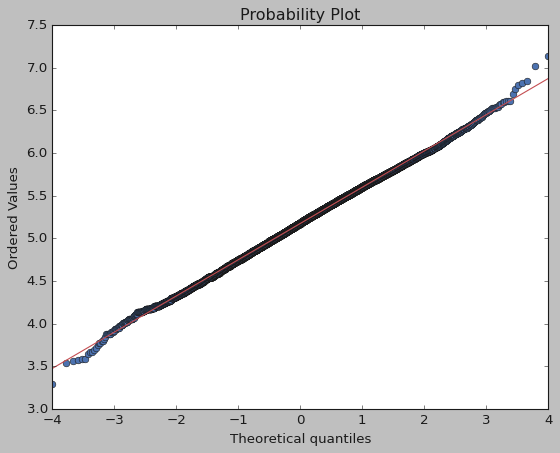

In [ ]:
sns.distplot(housedf['M2_living'], 
             fit= norm, 
             bins= 20, 
             kde= False,
             color= "lime")
fig = plt.figure()
res = stats.probplot(housedf['M2_living'], plot=plt)

* voir maintenant la relation linéaire entre "price" & "M2_living"

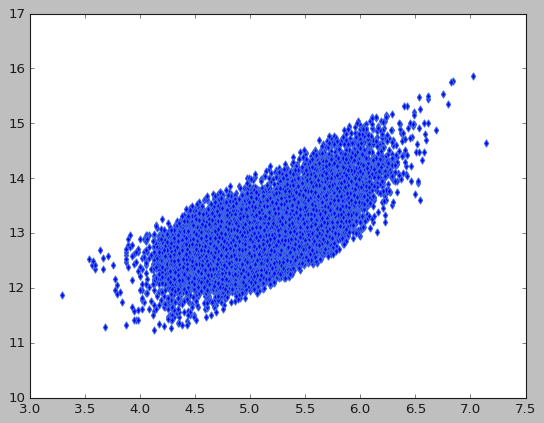

In [ ]:
#t = np.arange(100)
plt.scatter(housedf['M2_living'], housedf['price'], 
            marker="d", 
            c='blue', 
            edgecolors = "royalblue"
            )


# Regression

In [ ]:
# librairies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures 

* **Simple linear regression**

In [ ]:
# regression with one featur

In [ ]:
# 
x_pr = housedf[["M2_living"]]
y_pr = housedf["price"]
x_train, x_test, y_train, y_test = train_test_split(x_pr, y_pr, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(x_pr, y_pr)
yhat = lr.predict(x_pr)
pd.DataFrame({"Actual price": y_pr, "Predicted price": yhat}).head(10)

,Actual price,Predicted price
0,12.309982,12.648587
1,13.195614,13.299962
2,12.100712,12.291367
3,13.311329,13.073233
4,13.142166,12.944259
5,14.018451,13.924347
6,12.458775,12.961504
7,12.583995,12.558914
8,12.343658,12.992639
9,12.685408,13.042817


In [ ]:
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square
def evaluation(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [ ]:
lr = LinearRegression(normalize=True)
lr.fit(x_pr, y_pr)
yhat = lr.predict(x_pr)



In [ ]:
test_pred_ = lr.predict(x_test)
train_pred_ = lr.predict(x_train)

print('Test set evaluation:\n')
evaluation(y_test, test_pred_)
print('\n*************************\n')
print('Train set evaluation:')
evaluation(y_train, train_pred_)

Test set evaluation:

MAE: 0.3155166825873241
MSE: 0.15242652691591718
RMSE: 0.39041839981732057
R2 Square 0.46018273898413864

*************************

Train set evaluation:
MAE: 0.31430940810516755
MSE: 0.15043629314055063
RMSE: 0.38786117766612144
R2 Square 0.45340139227293674


* note; il n y a pas une grande différence entre le train et le test, c'est presque le même resultat exemple Rsqaured du training  et 0.453 (45%) et le model à prédit aproximativement 0.460 (46%)

In [ ]:
# voire les resultat de prediction sur un tableau
results_df = pd.DataFrame(data=[["simple Regression", *evaluate(y_test, test_pred_)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,simple Regression,0.315517,0.152427,0.390418,0.460183


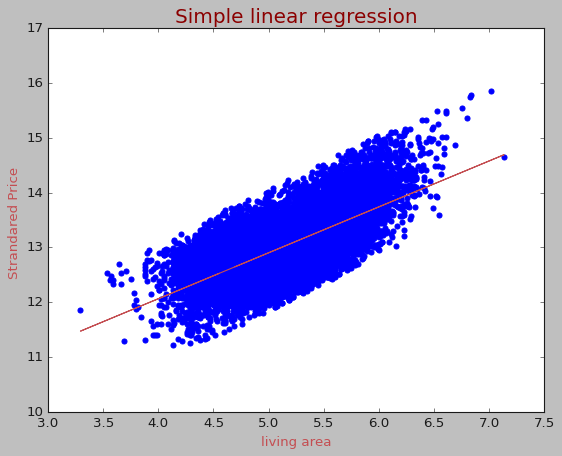

In [ ]:
# visulaliser le model
# Plot 
plt.scatter(x_pr, y_pr, color = "blue")
plt.plot(x_pr, yhat, "r")
plt.xlabel("living area", color="r")
plt.ylabel("Strandared Price ", color="r")
plt.title("Simple linear regression", fontsize= 18, color= "darkred")
plt.show()

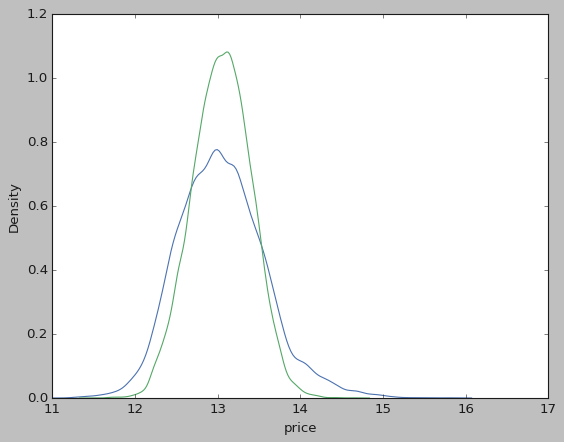

In [ ]:
sns.kdeplot(data = housedf, x = y_pr)
sns.kdeplot(data = housedf, x = yhat)

plt.show()

* **Multi linear regression**

In [ ]:
# my columns selection
selection = ["bedrooms", "bathrooms", "floors", "grade", "M2_living", "waterfront", "M2_basement", "view","M2_above", "lat"]     

In [ ]:

# extract x and y from our data
x= housedf[selection]  

# the target 
y= housedf["price"].values

# splitting data with test size of 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 3)

In [ ]:
x_train

,bedrooms,bathrooms,floors,grade,M2_living,waterfront,M2_basement,view,M2_above,lat
14084,3,2,1,7,4.943640,0,0.00,0,140.28,47.7218
13750,3,2,1,9,5.209595,0,0.00,4,183.02,47.2498
619,3,2,1,8,4.896197,0,0.00,0,133.78,47.3128
18985,3,1,1,7,4.531524,0,13.01,0,79.90,47.6857
21382,4,2,2,8,5.494706,0,0.00,0,243.40,47.4838
...,...,...,...,...,...,...,...,...,...,...
6400,3,1,1,6,4.189048,0,0.00,0,65.96,47.5194
15288,3,2,1,7,4.936989,0,40.88,0,98.48,47.3653
11513,3,2,2,7,5.292350,0,0.00,0,198.81,47.3840
1688,2,1,1,7,4.722153,0,0.00,0,112.41,47.4599


In [ ]:
len(y_train)

17290

In [ ]:
# build linear regression model
model = LinearRegression()

In [ ]:
# fitting the training data (ajuster les données)
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# testing our model’s performance
predicted = model.predict(x_test)
predicted

array([13.29733623, 13.84234304, 13.49660164, ..., 13.75431772,
       13.92575671, 12.52585202])

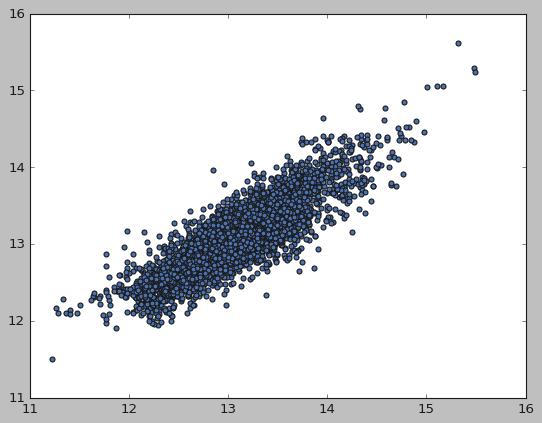

In [ ]:
plt.scatter(y_test, predicted)

In [ ]:
test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:')
evaluation(y_test, test_pred)
print('\n******************\n')
print('Train set evaluation:')
evaluation(y_train, train_pred)

Test set evaluation:
MAE: 0.20794844839745133
MSE: 0.07226669872909064
RMSE: 0.2688246616832069
R2 Square 0.7378215487793616

******************

Train set evaluation:
MAE: 0.21141508794426647
MSE: 0.07458514528794417
RMSE: 0.27310281083860005
R2 Square 0.7315331075641167


In [ ]:
results_df_2 = pd.DataFrame(data=[["multi linear Regression", *evaluate(y_test, test_pred)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,simple Regression,0.315517,0.152427,0.390418,0.460183
1,multi linear Regression,0.207948,0.072267,0.268825,0.737822


* note :
    - quand on a ajouter des autres feature et fair une linéaire multiple au lieu de simple linear, les résultat sont augmentés dans r2 squared de 0.46 à 0.73 
   - et dans mean absolute error aussi a diminuer de 0.31 vers 0.20, et squared error aussi, et rmse aussi de 0.39 a 0.26, 
   - cela veut dire que les erreurs se sont diminuer, 

In [ ]:
model.intercept_

-59.97003130778869

In [ ]:
model.coef_

array([-0.01585295,  0.02387352, -0.04075891,  0.15088955,  0.19349045,
        0.39258753,  0.0017884 ,  0.08906199,  0.00149565,  1.4847991 ])

In [ ]:
coeff_housedf = pd.DataFrame(model.coef_, x.columns, columns=["Coefficient"])
coeff_housedf

,Coefficient
bedrooms,-0.015853
bathrooms,0.023874
floors,-0.040759
grade,0.150890
M2_living,0.193490
waterfront,0.392588
M2_basement,0.001788
view,0.089062
M2_above,0.001496
lat,1.484799


* 4. Plot the linear regression. 

---

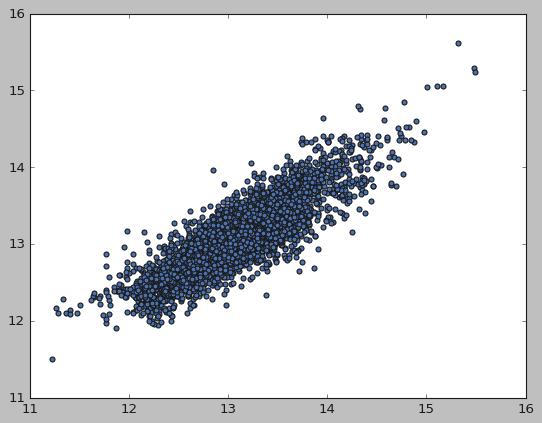

In [ ]:
plt.scatter(y_test, predicted)

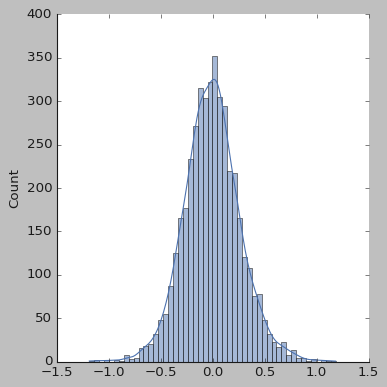

In [ ]:
sns.displot((y_test-predicted), bins=50, kde=True)

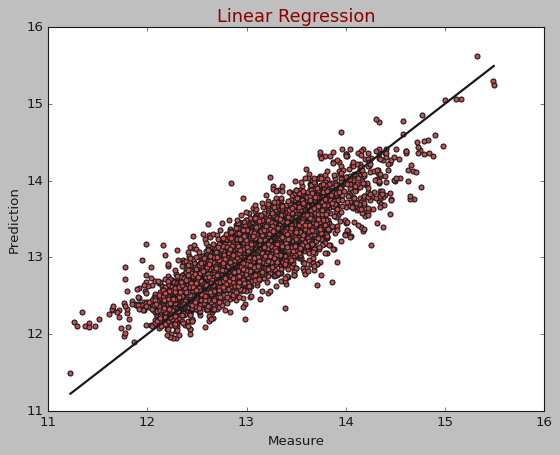

In [ ]:
y_predict_ln = model.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predict_ln, edgecolors="k", color="r")
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k-', lw=2)
ax.set_xlabel('Measure')
ax.set_ylabel('Prediction')
plt.title("Linear Regression", color="darkred", fontsize=16)
plt.show()


*  **Measure the performance of linear regression using the testing set**. 



In [ ]:
accuracy = model.score(x_test, y_test)
accuracy

0.7378215487793616

In [ ]:
print(f"the accuracy is {int(round(accuracy * 100))} %")

the accuracy is 74 %


In [ ]:
print(housedf.loc[[619]])

          date      price  bedrooms  ...  yr_renovated      lat     long
619  June-2014  12.254863         3  ...             0  47.3128 -122.184

[1 rows x 17 columns]


In [ ]:
# my actual values in (row 619) are = 3, 2, 1, 8, 4.896197, 0, 0.00, 0, 133.78, 47.3128
# and the standarized price is = 12.254863 (actual proce)
pred = model.predict([[3,2,1,8,4.896197,0,0.00,0,133.78,47.3128]])
pred
# the predicted price is = 12.5939731 (it is close)

array([12.5939731])

* accuracy using MSE

In [ ]:
print(np.mean( (predicted-y_test)**2 ))

0.07226669872909064


* - Mean Squared Error

In [ ]:
# Mean Squared Error
error = mean_squared_error(y_test, predicted)
print(error)
print(f"MSE =  {int(round(error * 100))} %")

0.07226669872909064
MSE =  7 %


* - R Squared

In [ ]:
rqs = metrics.r2_score(y_test, predicted)
print(rqs)
print(f"R squared =  {int(round(rqs * 100))} %")


0.7378215487793616
R squared =  74 %


* - Mean absolute error

In [ ]:
mae = mean_absolute_error(y_test, predicted)
print(mae)
print(f"mean absolute error =  {int(round(mae * 100))} %")

0.20794844839745133
mean absolute error =  21 %


* **Comparaison test/train model**





In [ ]:
test_pred = model.predict(x_test)
train_pred = model.predict(x_train)

print('Test set evaluation:')
evaluation(y_test, test_pred)
print('\n******************************\n')
print('Train set evaluation:')
evaluation(y_train, train_pred)

Test set evaluation:
MAE: 0.20794844839745133
MSE: 0.07226669872909064
RMSE: 0.2688246616832069
R2 Square 0.7378215487793616

******************************

Train set evaluation:
MAE: 0.21141508794426647
MSE: 0.07458514528794417
RMSE: 0.27310281083860005
R2 Square 0.7315331075641167


* **Polynomial regression and compare it to the linear and multilinear regression**. 

In [ ]:

poly = PolynomialFeatures(degree=2) 
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
x_train_poly.shape


(17290, 66)

In [ ]:
poly_lg = LinearRegression()
poly_lg.fit(x_train_poly, y_train)
y_predict_poly = poly_lg.predict(x_test_poly)
print(y_predict_poly)

[13.20980641 13.91137766 13.54222751 ... 13.81756054 14.07401076
 12.5028193 ]


In [ ]:
error = mean_squared_error(y_predict_poly, y_test)

root_mean_square_error = np.sqrt(error)
per = int(root_mean_square_error * 100)

print(root_mean_square_error)
print("RMSE for polynomial regression = ", per, "%")

0.25586064731698216
RMSE for polynomial regression =  25 %


* polyNomnial in one cell 

In [ ]:

poly_reg = PolynomialFeatures(degree=2)

x_train_2_d = poly_reg.fit_transform(x_train)
x_test_2_d = poly_reg.fit_transform(x_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train_2_d,y_train)

test_pred_p = lin_reg.predict(x_test_2_d)
train_pred_p = lin_reg.predict(x_train_2_d)

print('Test set evaluation:')
evaluation(y_test, test_pred_p)
print('\n******************************\n')
print('Train set evaluation:\n')
evaluation(y_train, train_pred_p)

Test set evaluation:
MAE: 0.19526242453853476
MSE: 0.06546467084536547
RMSE: 0.2558606473167874
R2 Square 0.7624988229191415

******************************

Train set evaluation:

MAE: 0.19726581424441184
MSE: 0.06646560192410757
RMSE: 0.2578092355291167
R2 Square 0.7607591493781019


* comparaison between regressions

In [ ]:
results_df_3 = pd.DataFrame(data=[["Polynomial Regression", *evaluate(y_test, test_pred_p)]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_dff = results_df.append(results_df_3, ignore_index=True)
results_dff

,Model,MAE,MSE,RMSE,R2 Square
0,simple Regression,0.315517,0.152427,0.390418,0.460183
1,multi linear Regression,0.207948,0.072267,0.268825,0.737822
2,Polynomial Regression,0.195262,0.065465,0.255861,0.762499


## * Conclusion

* il n ya pas une grande différence entre multi linear regression et polynomial regression, il ya les erreurs ce sont un peu diminué et r squared est augmenté de a peu près 3%, c'est mieux que simple linear regression ieux que fair des prédictions avec une seule colonne, 
- mais toujour le model n'est pas perfomant je pense pour certain datasets il faut des algorithmes plus avancés que multi-linear et polynomial regression et plus d'justement et normalisation et plus de complexe méthodes, pour que le model soit plus précis et performant.

* summary

---

---





* j'ai premièrement faire du data cleaning preprocessing 
* visualiser les résultats
- faire la relation entre les features ( correlation par heatmap )
- normaliser et transformer le prix et la living area par "log transformation"
- séléction les colonne pour le model (feature selection)
- deuxiement la regression liniéaire
- diviser le dataset en train set et test set
- calculer Mean squared error, mean absolute error, root squared mean error et R2squared pour faire aprés la regression la performance du model (accuracy)
- faire une regression simple avec la colonne M2_living et le target "price"
- ensuite multi-linear regression avec les features que j'ai seléctionné
- visuliser les résultat de la linéaire
- comparer entre regression avec une seulle colonne et plusieur colonnes
- visualiser la regression multiple

- créer une regression polynomial
- comparer toutes les regressions dans un tableau
- 
